In [33]:
import xdm_toolkit.xdm_plot as xplot
import xdm_toolkit.xdm_io as xdm_io
import matplotlib.pyplot as plt
import xdm_toolkit.peak_io.file_format as fm
import matplotlib.pyplot as plt
import numpy as np

In [15]:
test_file = '/Users/sfli/Consult/Spear_2017/Data/Jake/Mg/Reduced/z1/Mg_z1_000719.bin0'
reader = fm.I9PeakReader()
x, y, intensity, ID = reader.read(test_file)
x = np.array(x)
y = np.array(y)

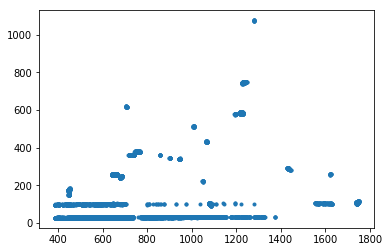

In [16]:
plt.figure()
plt.plot(x, y, '.')
plt.gca().invert_yaxis()
plt.show(block=False)

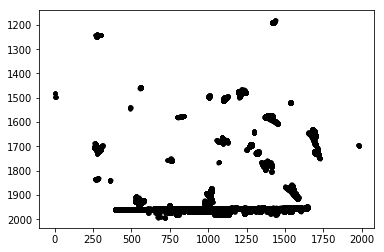

In [36]:
import xdm_toolkit.peak_utils as pu
reload(pu)

reload(fm)
input_dir = '/Users/sfli/Consult/Spear_2017/Data/Jake/Mg/Reduced/z1'
reader = fm.I9PeakReader()
#peak_list = reader.load_files(input_dir, 'Mg_z1_', 6, [0, 50], 2)
peak_list_all = reader.load_dir(input_dir, 2)
pu.plot_peaks(peak_list[0], 'r.')
plt.gca().invert_yaxis()


It seems weird that there are not too many different spots... Either the reduction paramters are not right, or something is wrong. Need to compare against raw images.

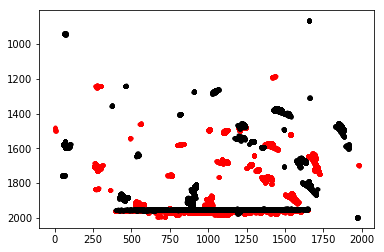

In [41]:
import xdm_toolkit.peak_utils as pu

reload(pu)

plt.figure()
pu.plot_peaks(peak_list[0], 'r.')
pu.plot_peaks(peak_list[1], 'k.')
plt.gca().invert_yaxis()

plt.show(block=False)